In [1]:
#allows any changes on external files to be loaded on code run.
%load_ext autoreload
%autoreload 2

# Gather all data in input uncertainty space to make a fake GENE to test the spatially adaptive sparse grids from sparseSpACE 


In [12]:
from GENE_ML.gene_ml.parsers.GENEparser import GENE_scan_parser
from GENE_ML.gene_ml.dataset.ScanData import ScanData
from config import config
import os

# parser
parameters = ['_grp_species_0-omt','_grp_species_1-omt','species-omn']
parser = GENE_scan_parser(config.save_dir, config.base_params_path)
ssg_data = ScanData('data_ssg_2omt-highprec_omn', parser=parser, host=None, remote_path=None,  test_percentage=0)
ssg_data.df.insert(1,'omt1',ssg_data.df.pop('omt1'))
ssg_data.df.rename(columns={'omt1':parameters[0], 'omt2':parameters[1], 'omn1': parameters[2]}, inplace=True)
ssg_data.set_from_df()
ssg_data.df




Initialising dataset
SSH PATH None:None

LOADING FROM SCANLOG DIR: /home/djdaniel/GENE_UQ/scanlogs/data_ssg_2omt-highprec_omn
LOG PATHS ['geneerr_batch-0_scanfiles-0.log' 'geneerr_batch-1_scanfiles-0.log'
 'scan_batch-0_scanfiles-0.log' 'scan_batch-1_scanfiles-0.log']

LOADING SCANLOG AND TIME INTO PANDAS DATAFRAME /home/djdaniel/GENE_UQ/scanlogs/data_ssg_2omt-highprec_omn/scan_batch-0_scanfiles-0.log : /home/djdaniel/GENE_UQ/scanlogs/data_ssg_2omt-highprec_omn/geneerr_batch-0_scanfiles-0.log

LOADING SCANLOG AND TIME INTO PANDAS DATAFRAME /home/djdaniel/GENE_UQ/scanlogs/data_ssg_2omt-highprec_omn/scan_batch-1_scanfiles-0.log : /home/djdaniel/GENE_UQ/scanlogs/data_ssg_2omt-highprec_omn/geneerr_batch-1_scanfiles-0.log

84 SAMPLES RAN OUT OF 99 BEFORE MAX WALLTIME:
NUMBER OF SAMPLES AFTER REMOVING NaN's: 84
NaN PERCENTAGE =  0.0
SETTING VARIABLES
TEST PERCENTAGE IS 0, NO SPLIT
TEST PERCENTAGE IS 0, NO SPLIT


,run_time,_grp_species_0-omt,_grp_species_1-omt,species-omn,growthrate,frequency
0,16.739,5.35,2.800000,1.530000,0.12091,0.06387
1,17.068,6.70,2.800000,1.530000,0.14990,0.07666
2,15.260,5.35,3.500000,1.530000,0.12286,0.05903
3,16.935,5.35,2.800000,2.900000,0.09682,-0.03230
4,14.677,4.00,2.800000,1.530000,0.08748,0.04885
...,...,...,...,...,...,...
37,13.279,5.35,2.338905,0.160000,0.11208,0.14882
38,16.836,5.35,3.204145,2.320970,0.11286,0.00899
39,14.242,5.35,2.100000,0.627572,0.11620,0.12186
40,15.789,5.35,3.500000,2.679778,0.10445,-0.02279


In [13]:
import numpy as np
import pandas as pd
# Getting Ground Truth Data
nominal = [2.7954880, 5.3871083, 1.5417906]
parameters = ['_grp_species_0-omt','_grp_species_1-omt','species-omn']
remote_save_names = ['modeTrans-highprec-'+p for p in parameters]
    
GENE_groundTruth = []
for rms in remote_save_names:
    GENE_groundTruth.append(ScanData(rms, parser=parser, host=None, remote_path=None,  test_percentage=0))

# Putting ground truth in correct format for inference, with other nominal parameters in place -------------   
nominal_block = np.stack([nominal for i in range(len(GENE_groundTruth[0].df))])
nominal_df = pd.DataFrame(nominal_block)
nominal_df.columns=parameters

for i in range(len(parameters)):
    new_df = nominal_df.copy()
    col = GENE_groundTruth[i].df.columns.values.tolist()
    new_df[parameters[i]] = GENE_groundTruth[i].df[col[1]].tolist()
    new_df['growthrate']=GENE_groundTruth[i].df['growthrate'].tolist()
    new_df['frequency']=GENE_groundTruth[i].df['frequency'].tolist()
    new_df.insert(0, 'run_time', GENE_groundTruth[i].df['run_time'].to_numpy())
    GENE_groundTruth[i].df = new_df
    GENE_groundTruth[i].set_from_df()    
    # print(GENE_groundTruth[i].x[0:5])
    # print(parameters)
    # print('NEW DF', GENE_groundTruth[i].df.head(5))


from IPython.display import display
for gt in GENE_groundTruth:
    display(gt.df.head())
#--------------------------------------------------------------------------------

Initialising dataset
SSH PATH None:None

LOADING FROM SCANLOG DIR: /home/djdaniel/GENE_UQ/scanlogs/modeTrans-highprec-_grp_species_0-omt
LOG PATHS ['geneerr_batch-0_scanfiles-0.log' 'geneerr_batch-1_scanfiles-0.log'
 'scan_batch-0_scanfiles-0.log' 'scan_batch-1_scanfiles-0.log']

LOADING SCANLOG AND TIME INTO PANDAS DATAFRAME /home/djdaniel/GENE_UQ/scanlogs/modeTrans-highprec-_grp_species_0-omt/scan_batch-0_scanfiles-0.log : /home/djdaniel/GENE_UQ/scanlogs/modeTrans-highprec-_grp_species_0-omt/geneerr_batch-0_scanfiles-0.log

LOADING SCANLOG AND TIME INTO PANDAS DATAFRAME /home/djdaniel/GENE_UQ/scanlogs/modeTrans-highprec-_grp_species_0-omt/scan_batch-1_scanfiles-0.log : /home/djdaniel/GENE_UQ/scanlogs/modeTrans-highprec-_grp_species_0-omt/geneerr_batch-1_scanfiles-0.log

50 SAMPLES RAN OUT OF 55 BEFORE MAX WALLTIME:
NUMBER OF SAMPLES AFTER REMOVING NaN's: 50
NaN PERCENTAGE =  0.0
SETTING VARIABLES
TEST PERCENTAGE IS 0, NO SPLIT
Initialising dataset
SSH PATH None:None

LOADING FROM SCA

,run_time,_grp_species_0-omt,_grp_species_1-omt,species-omn,growthrate,frequency
0,30.330,4.000000,5.387108,1.541791,0.08769,0.03151
1,31.028,4.055102,5.387108,1.541791,0.08940,0.03205
2,27.473,4.110204,5.387108,1.541791,0.09110,0.03260
3,27.004,4.165306,5.387108,1.541791,0.09278,0.03314
4,25.307,4.220408,5.387108,1.541791,0.09445,0.03369


,run_time,_grp_species_0-omt,_grp_species_1-omt,species-omn,growthrate,frequency
0,22.374,2.795488,2.100000,1.541791,0.05138,0.03575
1,22.731,2.795488,2.128571,1.541791,0.05138,0.03558
2,21.778,2.795488,2.157143,1.541791,0.05139,0.03542
3,21.954,2.795488,2.185714,1.541791,0.05140,0.03526
4,21.649,2.795488,2.214286,1.541791,0.05140,0.03510


,run_time,_grp_species_0-omt,_grp_species_1-omt,species-omn,growthrate,frequency
0,39.991,2.795488,5.387108,0.160000,0.05315,0.11363
1,41.053,2.795488,5.387108,0.215918,0.05404,0.10973
2,40.253,2.795488,5.387108,0.271837,0.05486,0.10586
3,39.620,2.795488,5.387108,0.327755,0.05560,0.10201
4,39.532,2.795488,5.387108,0.383674,0.05626,0.09817


In [16]:
for gt in GENE_groundTruth:
    ssg_data.concat([gt])
data_combi = ssg_data

TEST PERCENTAGE IS 0, NO SPLIT
TEST PERCENTAGE IS 0, NO SPLIT
TEST PERCENTAGE IS 0, NO SPLIT


# Training GPR to be the fake GENE

In [17]:
from GENE_ML.gene_ml.models.GPR import GPR
gpr = GPR(name='gpr_ssg_points_gt')
gpr.fit(x=data_combi.x, y=data_combi.growthrates)

GPR is a parameterless approach and does not have a training step. Instead the hyperparameters are tuned to the data.
OPTIMISING THE HYPERPERS
CURRENT HYPERS:
 
Name : GP regression
Objective : 358.50353458180234
Number of Parameters : 5
Number of Optimization Parameters : 5
Updates : True
Parameters:
  GP_regression.           |  value  |  constraints  |  priors
  rbf.variance             |    1.0  |      +ve      |        
  rbf.lengthscale          |   (3,)  |      +ve      |        
  Gaussian_noise.variance  |    1.0  |      +ve      |        
OPTIMISING THE HYPERPERS:
Optimization restart 1/3, f = -2676.304914432781
Optimization restart 2/3, f = -2676.3048953303687
Optimization restart 3/3, f = -2676.304898886949
RESULTING HYPERS:
 
Name : GP regression
Objective : -2676.304914432781
Number of Parameters : 5
Number of Optimization Parameters : 5
Updates : True
Parameters:
  GP_regression.           |                  value  |  constraints  |  priors
  rbf.variance             |  

Initialising dataset
SSH PATH None:None

LOADING FROM SCANLOG DIR: /home/djdaniel/GENE_UQ/scanlogs/modeTrans-highprec-_grp_species_0-omt
LOG PATHS ['geneerr_batch-0_scanfiles-0.log' 'geneerr_batch-1_scanfiles-0.log'
 'scan_batch-0_scanfiles-0.log' 'scan_batch-1_scanfiles-0.log']

LOADING SCANLOG AND TIME INTO PANDAS DATAFRAME /home/djdaniel/GENE_UQ/scanlogs/modeTrans-highprec-_grp_species_0-omt/scan_batch-0_scanfiles-0.log : /home/djdaniel/GENE_UQ/scanlogs/modeTrans-highprec-_grp_species_0-omt/geneerr_batch-0_scanfiles-0.log

LOADING SCANLOG AND TIME INTO PANDAS DATAFRAME /home/djdaniel/GENE_UQ/scanlogs/modeTrans-highprec-_grp_species_0-omt/scan_batch-1_scanfiles-0.log : /home/djdaniel/GENE_UQ/scanlogs/modeTrans-highprec-_grp_species_0-omt/geneerr_batch-1_scanfiles-0.log

50 SAMPLES RAN OUT OF 55 BEFORE MAX WALLTIME:
NUMBER OF SAMPLES AFTER REMOVING NaN's: 50
NaN PERCENTAGE =  0.0
SETTING VARIABLES
TEST PERCENTAGE IS 0, NO SPLIT
Initialising dataset
SSH PATH None:None

LOADING FROM SCA

,run_time,_grp_species_0-omt,_grp_species_1-omt,species-omn,growthrate,frequency
0,30.330,4.000000,5.387108,1.541791,0.08769,0.03151
1,31.028,4.055102,5.387108,1.541791,0.08940,0.03205
2,27.473,4.110204,5.387108,1.541791,0.09110,0.03260
3,27.004,4.165306,5.387108,1.541791,0.09278,0.03314
4,25.307,4.220408,5.387108,1.541791,0.09445,0.03369


,run_time,_grp_species_0-omt,_grp_species_1-omt,species-omn,growthrate,frequency
0,22.374,2.795488,2.100000,1.541791,0.05138,0.03575
1,22.731,2.795488,2.128571,1.541791,0.05138,0.03558
2,21.778,2.795488,2.157143,1.541791,0.05139,0.03542
3,21.954,2.795488,2.185714,1.541791,0.05140,0.03526
4,21.649,2.795488,2.214286,1.541791,0.05140,0.03510


,run_time,_grp_species_0-omt,_grp_species_1-omt,species-omn,growthrate,frequency
0,39.991,2.795488,5.387108,0.160000,0.05315,0.11363
1,41.053,2.795488,5.387108,0.215918,0.05404,0.10973
2,40.253,2.795488,5.387108,0.271837,0.05486,0.10586
3,39.620,2.795488,5.387108,0.327755,0.05560,0.10201
4,39.532,2.795488,5.387108,0.383674,0.05626,0.09817



COMPUTING RESULTS

GT DATA NAME modeTrans-highprec-_grp_species_0-omt

COMPUTING RESULTS

GT DATA NAME modeTrans-highprec-_grp_species_1-omt

COMPUTING RESULTS

GT DATA NAME modeTrans-highprec-species-omn


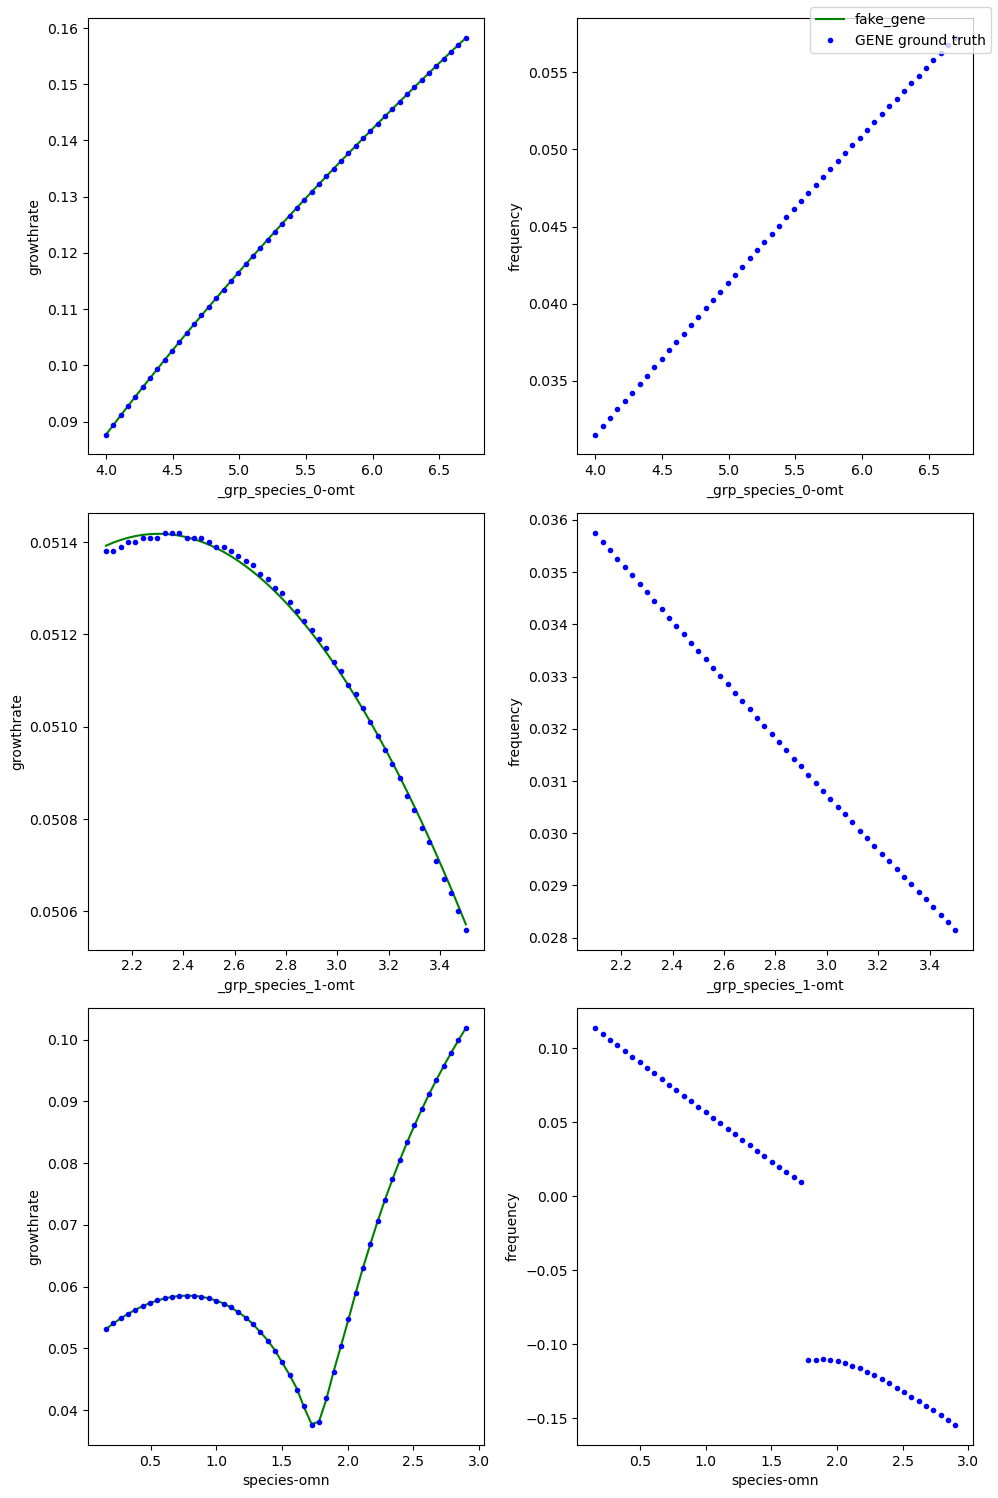

In [19]:
from gene_uq import mode_transition_test

mode_transition_test(gpr, 'fake_gene')